In [2]:
! pip install brewer2mpl

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import *
from IPython.display import Image
import matplotlib.ticker as mtick

import scipy.stats as stats
import statsmodels.stats.weightstats as wstats
from collections import OrderedDict

import brewer2mpl
brewer_set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors

from __future__ import print_function
from __future__ import division
%matplotlib inline

In [8]:
# Let's generate some fake data
conversion_a = 0.015 # higher conversion rate in group A
conversion_b = 0.013 # higher conversion rate in group B
installs_a = 23000 # cohort sizes are equal, for simplicity
installs_b = 23000
payers_a = int(installs_a * conversion_a)
payers_b = int(installs_b * conversion_b)
print('payers A', payers_a)
print('payers B', payers_b)

payers A 345
payers B 299


In [5]:
# Check that the difference in Conversion Rates is statistically significant for Alpha=0.05

from statsmodels.stats.proportion import proportions_ztest
count = np.array([payers_a,payers_b])
nobs = np.array([installs_a, installs_b])
z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = 2.08484201145 
 p-value = 0.0370836438406


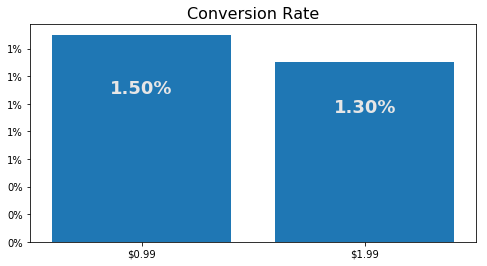

In [6]:
fig, ax = plt.subplots(figsize=(8,4))

x = [0,1]
y = [payers_a/installs_a, payers_b/installs_b]
ax.bar(x, y, align='center', width=.8)
ax.set_xticks(x)
ax.set_xticklabels(['$0.99', '$1.99'])
xlim(-.5,1.5)

for xx, yy in zip(x,y):
    ax.text(xx, yy*.7, '%0.2f%%'%(100*yy),ha='center', va='bottom', fontdict={'size':18,'weight':'bold','color':(0.9,.9,.9)})
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos=0: '%0.0f%%'%(100.0*x)))
title('Conversion Rate', fontdict={'size':16})
pass
# fig.savefig('04.01 conversion rate.png', bbox_inches='tight', pad_inches=0.2 ,dpi=200)